# Algorithmic Trading - Beginners

### Basics

Companies issue stocks to raise capital - prices will reflect supply and demand not neccesarily what the stock is worth.

Trading is not just limited to stocks, any assets are tradable ie gold, currency

Essentially create a strategy that goes either long or short depending on how you think the stock will perform.

In [120]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime

# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm

# Import the `datetools` module from `pandas`
# from pandas.core import datetools

#aapl = pdr.get_data_yahoo('AAPL', 
                        #  start=datetime.datetime(2006, 10, 1),
                        #  end=datetime.datetime(2012, 1, 1))

Data has been imported using the above methods - other methods are available.

Firstly we will view the data as with any normal data project.



In [56]:
# view the head of the data
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,2.709643,2.653571,2.682143,2.673571,712639200,2.310338
2006-10-03,2.676786,2.613929,2.658929,2.645714,790708800,2.286266
2006-10-04,2.695000,2.612857,2.646429,2.692143,829082800,2.326385
2006-10-05,2.720000,2.647500,2.661786,2.672500,683883200,2.309412
2006-10-06,2.680000,2.636071,2.657857,2.650714,466958800,2.290586


In [57]:
# view the tail of the data
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-12-23,14.413929,14.267500,14.274643,14.404643,269399200,12.447616
2011-12-27,14.610357,14.393572,14.396428,14.518929,265076000,12.546378
2011-12-28,14.580358,14.333571,14.531786,14.380000,228662000,12.426320
2011-12-29,14.487500,14.303928,14.407143,14.468572,215978000,12.502859
2011-12-30,14.510000,14.410357,14.411072,14.464286,179662000,12.499158


In [58]:
# describe the data
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.000000
mean,7.309392,7.126921,7.225253,7.222288,7.531586e+08,6.241062
std,3.549753,3.507440,3.530783,3.529933,4.108027e+08,3.050354
min,2.642143,2.592857,2.622143,2.615357,1.574944e+08,2.260033
25%,4.438214,4.295536,4.364464,4.357857,4.488148e+08,3.765795
50%,6.410714,6.181428,6.315000,6.280000,6.519464e+08,5.426795
75%,9.783215,9.587857,9.694286,9.675000,9.264920e+08,8.360546
max,15.239285,14.856786,15.062857,15.080000,3.372970e+09,13.031218


## Time Series Data

Numerical data taken at successive equally spaced points in time. Shows the movement of stocks over a specific time period.

We can see that the data contains the High, Low, Open, Close, Volume and Adj Close.

Volume - registers number of shares that got traded on a given day

Adj Close - closing price adjusted to include actions that occurred at any time previous to the next days open, use to examine historical returns or detailed analysis on historical returns.

Row labels contain dates 
Column labels contain numerical values

### Subsetting and inspecting

Inspect index and columns and subset, creates a Series that is a one-dimensional labeled array capable of holding any type.

In [59]:
# Look at the index
aapl.index

# Look at columns
aapl.columns

# Select the last x observations of 'Close'
ts = aapl['Close'][-10:]

# Check the type
type(ts)

pandas.core.series.Series

It is also possible to use *loc()* and *iloc()* to subset.

*loc* is label based indexing 

*iloc()* is positional indexing

In [60]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

                High       Low      Open     Close     Volume  Adj Close
Date                                                                    
2006-11-01  2.906429  2.798571  2.896429  2.827143  611192400   2.443045
2006-11-02  2.832857  2.803571  2.818571  2.820714  465483200   2.437490
2006-11-03  2.840357  2.778214  2.834286  2.796072  431888800   2.416195
2006-11-06  2.859286  2.801071  2.819643  2.846786  434576800   2.460019
2006-11-07  2.892857  2.861786  2.873214  2.875357  525932400   2.484709


In [61]:
# Inspect first rows of 2007
print(aapl.loc['2007'].head())

                High       Low      Open     Close      Volume  Adj Close
Date                                                                     
2007-01-03  3.092143  2.925000  3.081786  2.992857  1238319600   2.586245
2007-01-04  3.069643  2.993572  3.001786  3.059286   847260400   2.643649
2007-01-05  3.078571  3.014286  3.063214  3.037500   834741600   2.624823
2007-01-08  3.090357  3.045714  3.070000  3.052500   797106800   2.637785
2007-01-09  3.320714  3.041071  3.087500  3.306072  3349298400   2.856907


In [62]:
# Inspect November 2006
print(aapl.iloc[22:43])

                High       Low      Open     Close      Volume  Adj Close
Date                                                                     
2006-11-01  2.906429  2.798571  2.896429  2.827143   611192400   2.443045
2006-11-02  2.832857  2.803571  2.818571  2.820714   465483200   2.437490
2006-11-03  2.840357  2.778214  2.834286  2.796072   431888800   2.416195
2006-11-06  2.859286  2.801071  2.819643  2.846786   434576800   2.460019
2006-11-07  2.892857  2.861786  2.873214  2.875357   525932400   2.484709
2006-11-08  2.953214  2.853214  2.857857  2.944643   690916800   2.544581
2006-11-09  3.024643  2.932857  2.960714  2.976429   923053600   2.572048
2006-11-10  2.985714  2.946429  2.983929  2.968571   373864400   2.565259
2006-11-13  3.016071  2.951429  2.972143  3.012500   450674000   2.603219
2006-11-14  3.035714  2.996428  3.028571  3.035714   588954800   2.623279
2006-11-15  3.067857  3.000000  3.037500  3.001786   655323200   2.593961
2006-11-16  3.082143  3.022143  3.0310

In [63]:
# Inspect 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0,3]])

                High     Close
Date                          
2006-11-01  2.906429  2.827143
2006-12-01  3.297500  3.261429


Alongside Indexing can try techniques such as resampling shown below.

In [64]:
# Sample 20 rows
sample = aapl.sample(20)

# Print 'sample'
print(sample)

# Reshape to monthly
monthly_aapl = aapl.resample('M').mean()

# Print 'monthly_aapl'
print(monthly_aapl)

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2008-06-26   6.244286   6.000357   6.216786   6.009286   869610000   5.192859
2008-05-20   6.648571   6.432857   6.493571   6.639286   969850000   5.737267
2010-12-30  11.625357  11.537500  11.624286  11.559286   157494400   9.988830
2007-11-01   6.789286   6.428571   6.735714   6.694286   805036400   5.784795
2011-07-28  14.178214  13.861786  13.986428  13.993571   594034000  12.092395
2011-09-02  13.500000  13.279643  13.383572  13.358929   438939200  11.543972
2009-05-26   4.672500   4.448214   4.455714   4.670714   636927200   4.036147
2011-02-28  12.680357  12.540000  12.544286  12.614643   403074000  10.900808
2011-03-07  12.916785  12.546785  12.907143  12.691428   546123200  10.967158
2010-02-16   7.274643   7.197143   7.212143   7.264286   543737600   6.277353
2009-12-02   7.193572   6.991071   7.105714   7.008214   7152600

*asfreq()* is a different method of monthly you can see the difference displayed below

In [65]:
aapl.asfreq("M", method="bfill")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,2.917143,2.865357,2.908929,2.895714,501474400,2.502301
2006-11-30,3.310000,3.252143,3.293214,3.273571,870486400,2.828821
2006-12-31,3.092143,2.925000,3.081786,2.992857,1238319600,2.586245
2007-01-31,3.071429,3.012500,3.030714,3.061786,856069200,2.645809
2007-02-28,3.057143,2.964286,2.964286,3.021786,919475200,2.611244
...,...,...,...,...,...,...
2011-07-31,14.267858,14.013214,14.206429,14.169642,612836000,12.244542
2011-08-31,14.002857,13.637857,13.948929,13.743929,522586400,11.876668
2011-09-30,13.888928,13.613571,13.825714,13.618571,547640800,11.768343


We could subtract the Open values form the Close values to interpret the differences, for now we will look at how then delete.

In [66]:
# Add a 'diff' column to 'aapl'
aapl['diff'] = aapl.Open - aapl.Close

# Delete new 'diff' column
del aapl['diff']

Knowing the gains in absolute terms might already help you to get an idea of whether you’re making a good investment, but as a quant, you might be more interested in a more relative means of measuring your stock’s value, like how much the value of a particular stock has gone up or gone down. A way to do this is by calculating the daily percentage change.

## Visualising the data 

We can use matplotlib to visualise our timeseries as shown below. There are many different plots.

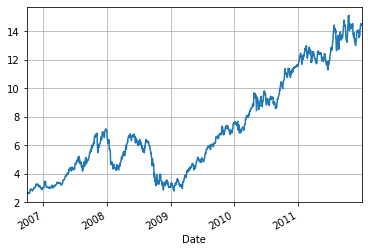

In [67]:
# Plot closing prices
aapl['Close'].plot(grid=True)
plt.show()

# Common Financial Analysis

Common types are to look at returns, moving windows, volatility, and Ordinary Least-Squares Regression (OLS). We shall firstly look at returns.

### Returns

Daily percentage change doesnt consider dividends amongst other factors, represents the amount of % change in stock value over a single trading day. We can calculate this using numpys *pct_change()*.

Can calculate log returns in order to get better insight into growth of returns over time.

In [69]:
# Assign 'Adj Close' to 'daily_close'
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_change)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017548
2006-10-05  -0.007296
2006-10-06  -0.008152
...               ...
2011-12-23   0.011993
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006159
2011-12-30  -0.000296

[1323 rows x 1 columns]
            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017396
2006-10-05  -0.007323
2006-10-06  -0.008185
...               ...
2011-12-23   0.011922
2011-12-27   0.007903
2011-12-28  -0.009615
2011-12-29   0.006141
2011-12-30  -0.000296

[1323 rows x 1 columns]


### Monthly and Quarterly Returns

We can also know monthly (first) and quaterly (second) returns using the previously shown *resample* method.

In [74]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-30,0.134672,0.134987,0.132106,0.130488,0.735854,0.130488
2006-12-29,-0.078550,-0.084560,-0.089578,-0.074405,0.236584,-0.074405
2007-01-31,0.007026,0.011876,0.010840,0.010490,-0.204714,0.010490
2007-02-28,-0.004651,-0.016005,-0.021918,-0.013064,0.074066,-0.013064
...,...,...,...,...,...,...
2011-08-31,-0.007769,-0.005573,0.007559,-0.014469,-0.173887,-0.014469
2011-09-30,-0.008136,-0.001781,-0.008833,-0.009121,0.047943,-0.009121
2011-10-31,0.052560,0.052128,0.039523,0.061523,-0.296069,0.061523


In [77]:
# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.126451,0.121460,0.125777,0.122860,0.369611,0.122860
2007-06-30,0.195413,0.198331,0.196030,0.197735,-0.080296,0.197735
2007-10-31,0.404613,0.392010,0.400961,0.400796,0.306882,0.400796
2008-02-29,0.130711,0.117746,0.127066,0.120394,0.172293,0.120394
2008-06-30,-0.004290,0.005927,-0.003550,0.003673,-0.209762,0.003673
2008-10-31,-0.108879,-0.124618,-0.114267,-0.118803,0.133219,-0.118803
2009-02-28,-0.363388,-0.359305,-0.363639,-0.360865,-0.161601,-0.360865
2009-06-30,0.304359,0.324702,0.312134,0.316588,-0.386935,0.316588


Using the shift function shows how the percentages are calculated. As demonstrated below.

In [76]:
# Daily returns
daily_pct_change = daily_close / daily_close.shift(1) - 1

# Print daily_pct_change
print(daily_pct_change)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010419
2006-10-04   0.017548
2006-10-05  -0.007296
2006-10-06  -0.008152
...               ...
2011-12-23   0.011993
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006159
2011-12-30  -0.000296

[1323 rows x 1 columns]


In [79]:
# calculate daily log returns
daily_log_returns_shift = np.log(daily_close / daily_close.shift(1))
print(daily_log_returns_shift)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017396
2006-10-05  -0.007323
2006-10-06  -0.008185
...               ...
2011-12-23   0.011922
2011-12-27   0.007903
2011-12-28  -0.009615
2011-12-29   0.006141
2011-12-30  -0.000296

[1323 rows x 1 columns]


Calculation for the daily percentage change shown here.

Plot the *daily_pct_change* using matplotlib.

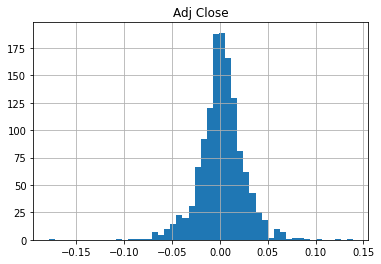

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139049


In [80]:
# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

The distribution looks symmerical and normally distributed, daily changes are centred around the bin 0.00, describe helps interpret the results of the histogram. Mean is close to 0. St Dev is also very close to 0.

Cumulative daily rate of return is useful to determine the value of an investment at regular intervals. Calculated by 1 + daily pct changes and calculating the cumulative product.

In [81]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03   0.989581
2006-10-04   1.006946
2006-10-05   0.999599
2006-10-06   0.991451
...               ...
2011-12-23   5.387790
2011-12-27   5.430538
2011-12-28   5.378573
2011-12-29   5.411702
2011-12-30   5.410100

[1323 rows x 1 columns]


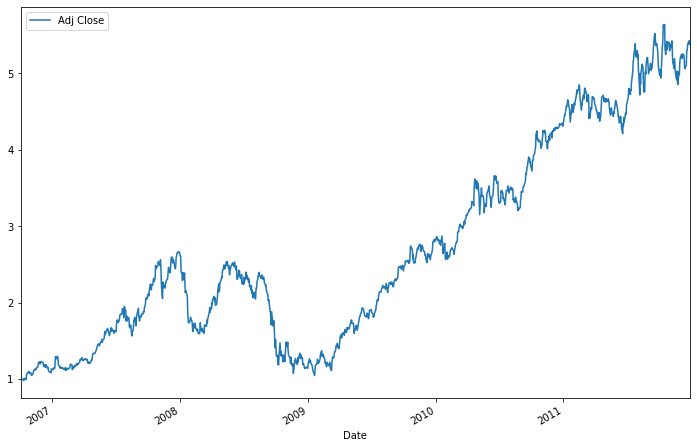

In [82]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

Again, can use *resample()* to see monthly or quarterly returns,

            Adj Close
Date                 
2006-10-31   1.031710
2006-11-30   1.140058
2006-12-31   1.155110
2007-01-31   1.187303
2007-02-28   1.145176
...               ...
2011-08-31   5.032896
2011-09-30   5.243032
2011-10-31   5.306305
2011-11-30   5.140465
2011-12-31   5.248871

[63 rows x 1 columns]


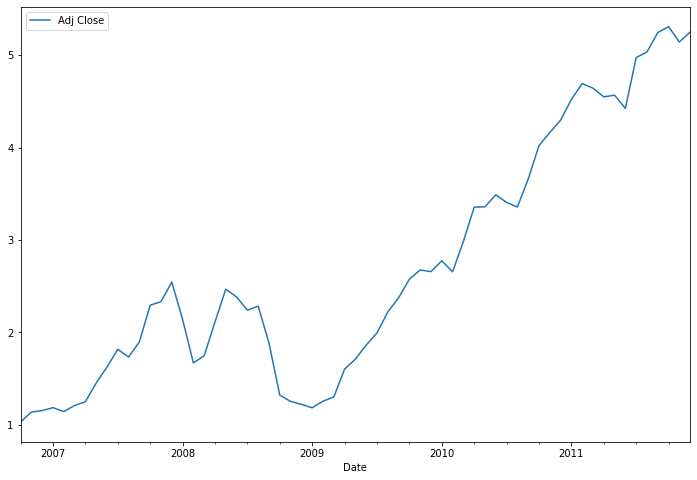

In [84]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

# Plot the cumulative monthly returns
cum_monthly_return.plot(figsize=(12,8))

Calculating returns can be valuable but oftentimes these numbers are fairly irrelevant when compared to other stocks. We shall now retrieve other stock data to make useful analyses between varyingn stocks.

### Retrieve addidtional stock data 

*Ticker* - is the symbol of the stock.

*Data()* - takes ticker and gets data from the startdate to enddate and returns it so the *get()* function can continue

In [85]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))

The data for Apple, Microsoft, IBM, Google has been loaded into the *all_data* DataFrame.

We can now use this to make varying plots.

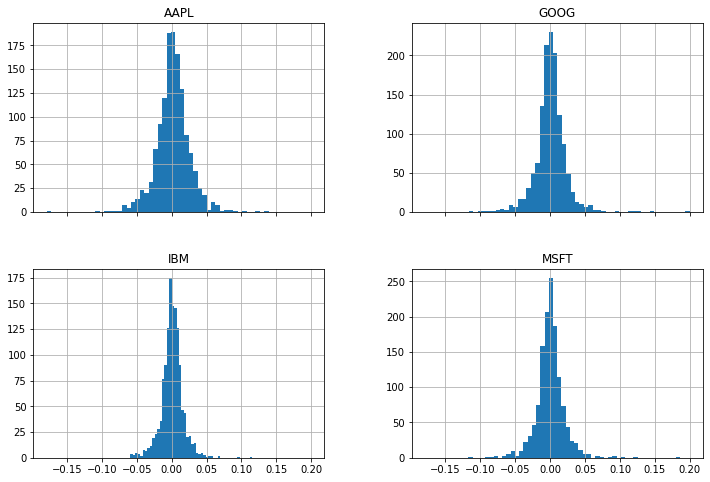

In [89]:
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

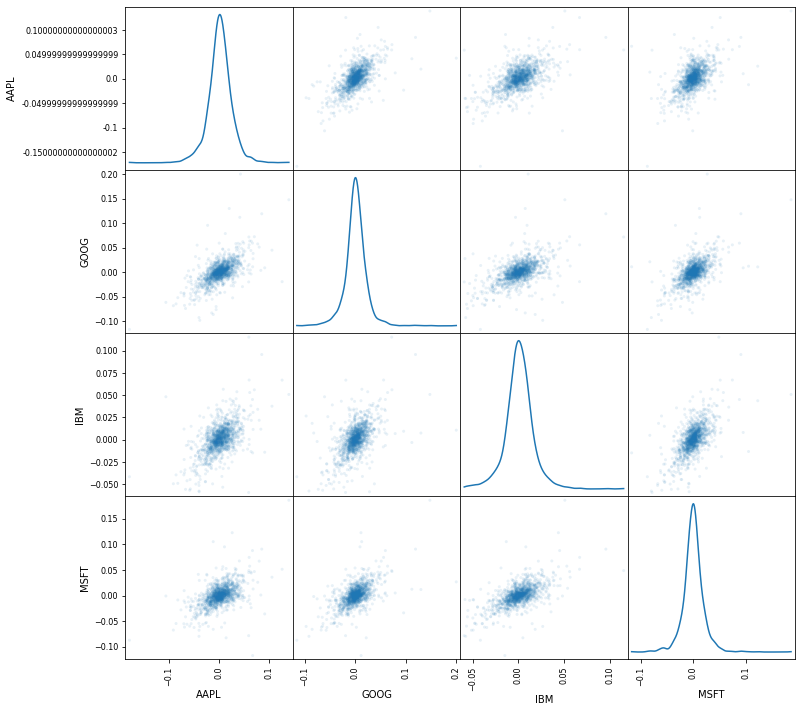

In [91]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

Analyse these graphs to see what sort of things they show.

All the above is common financial analysis.

# Moving Windows

Compute the statistics on a window of data represented by a time period and then slide the window accross the data by a specified interval. The statistic is continually calculated while the window falls within the dates of the time series.

Many different moving windows depending on the statistic you would like to calculate e.g a rolling meanwill smoothe short term fluctuations and make longer term trends more apparent.

In [96]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
print(moving_avg[-10:])

# Calculate the rolling max
moving_avg = adj_close_px.rolling(window=40).max()

# Inspect the result
print(moving_avg[-10:])

# Calculate the rolling var
moving_avg = adj_close_px.rolling(window=40).var()

# Inspect the result
print(moving_avg[-10:])

Date
2011-12-16    11.996343
2011-12-19    11.988118
2011-12-20    11.980541
2011-12-21    11.979523
2011-12-22    11.977941
2011-12-23    11.976892
2011-12-27    11.978111
2011-12-28    11.976460
2011-12-29    11.983103
2011-12-30    11.988959
Name: Adj Close, dtype: float64
Date
2011-12-16    12.537117
2011-12-19    12.537117
2011-12-20    12.537117
2011-12-21    12.537117
2011-12-22    12.537117
2011-12-23    12.537117
2011-12-27    12.546378
2011-12-28    12.546378
2011-12-29    12.546378
2011-12-30    12.546378
Name: Adj Close, dtype: float64
Date
2011-12-16    0.124058
2011-12-19    0.124597
2011-12-20    0.118582
2011-12-21    0.118006
2011-12-22    0.116860
2011-12-23    0.115803
2011-12-27    0.117165
2011-12-28    0.115532
2011-12-29    0.120850
2011-12-30    0.125607
Name: Adj Close, dtype: float64


Plot the results to better understand what the data is showing

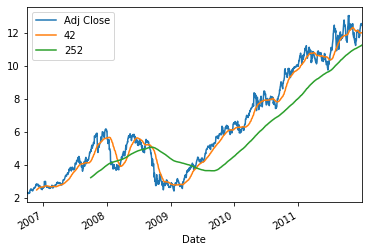

In [97]:
# Import matplotlib 
import matplotlib.pyplot as plt

# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot()

# Show plot
plt.show()

### Volatility Calculation

A measurement of the change in variance in the returns of a stock over a specific period of time. Comparisons to other stocks help to 'get a feel' for which may have more/less risk or comparison to a market index to examine the stocks volatility in the overall market.

Generally, the higher the volatility, the riskier the investment in that stock, which results in investing in one over another.

The moving historical standard deviation of the log returns—i.e. the moving historical volatility is also of great interest.

We calculate by taking a rolling window standard deviation on the pct change in a stock as we can see in the below code.

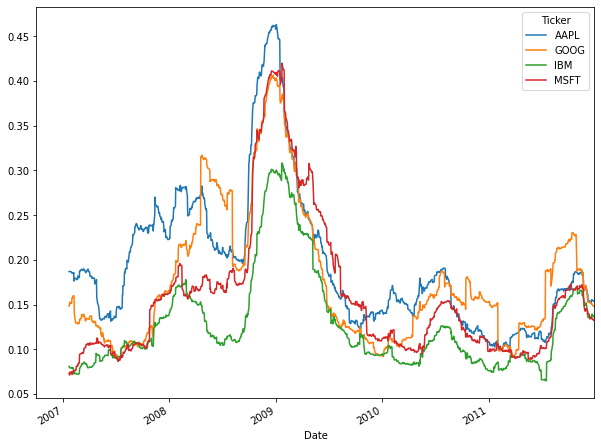

In [99]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

The size of the window requires skill to correctly choose, large window is less representative, narrower will move towards the st dev.

## Ordinary Least-Squares Regression

A more statistical analysis of the data. We can make use of the statsmodels library allowing us to also conduct statistical tests and perform statistical data analysis.

In [2]:
# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

NameError: name 'all_data' is not defined

Note that you add [1:] to the concatenation of the AAPL and MSFT return data so that you don’t have any NaN values that can interfere with your model.

### Interpretation of Left Column

Things to look out for when you’re studying the result of the model summary are the following:

The *Dep. Variable*, which indicates which variable is the response in the model

The Model, in this case, is *OLS*. It’s the model you’re using in the fit

Additionally, you also have the *Method* to indicate how the parameters of the model were calculated. In this case, you see that this is set at *Least Squares*.

#### Also Interesting

The number of observations (No. Observations). Note that you could also derive this with the Pandas package by using the info() function. Run return_data.info() in the IPython console of the DataCamp Light chunk above to confirm this.

The degree of freedom of the residuals (DF Residuals)

The number of parameters in the model, indicated by DF Model; Note that the number doesn’t include the constant term X which was defined in the code above.

### Interpretation of Right Column

*R-squared*, which is the coefficient of determination. This score indicates how well the regression line approximates the real data points. In this case, the result is *0.280*. In percentages, this means that the score is at 28%. When the score is 0%, it indicates that the model explains none of the variability of the response data around its mean. Of course, a score of 100% indicates the opposite.

You also see the *Adj. R-squared* score, which at first sight gives the same number. However, the calculation behind this metric adjusts the R-Squared value based on the number of observations and the degrees-of-freedom of the residuals (registered in *DF Residuals*). The adjustment in this case hasn’t had much effect, as the result of the adjusted score is still the same as the regular R-squared score.

The *F-statistic* measures how significant the fit is. It is calculated by dividing the mean squared error of the model by the mean squared error of the residuals. The F-statistic for this model is *514.2*.

Next, there’s also the *Prob (F-statistic)*, which indicates the probability that you would get the result of the *F-statistic*, given the null hypothesis that they are unrelated.

The *Log-likelihood* indicates the log of the likelihood function, which is, in this case *3513.2*.

The *AIC* is the Akaike Information Criterion: this metric adjusts the log-likelihood based on the number of observations and the complexity of the model. The AIC of this model is *-7022*.

Lastly, the *BIC* or the Bayesian Information Criterion, is similar to the AIC that you just have seen, but it penalizes models with more parameters more severely. Given the fact that this model only has one parameter (check *DF Model*), the BIC score will be the same as the AIC score.

### Below the model summary

The estimated value of the coefficient is registered at *coef*.

*std err* is the standard error of the estimate of the coefficient.

There’s also the t-statistic value, which you’ll find under *t*. This metric is used to measure how statistically significant a coefficient is.

*P > |t|* indicates the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response. In this case, you see that the constant has a value of 0.198, while AAPL is set at 0.000.

*Omnibus*, which is the Omnibus D’Angostino’s test: it provides a combined statistical test for the presence of skewness and kurtosis.

The *Prob(Omnibus)* is the *Omnibus* metric turned into a probability.

Next, the *Skew* or Skewness measures the symmetry of the data about the mean.

The *Kurtosis* gives an indication of the shape of the distribution, as it compares the amount of data close to the mean with those far away from the mean (in the tails).

*Durbin-Watson* is a test for the presence of autocorrelation, and the *Jarque-Bera* is another test of the skewness and kurtosis. You can also turn the result of this test into a probability, as you can see in *Prob (JB)*.

Lastly, you have the *Cond. No*, which tests the multicollinearity.

We can plot the OLS as shown below.

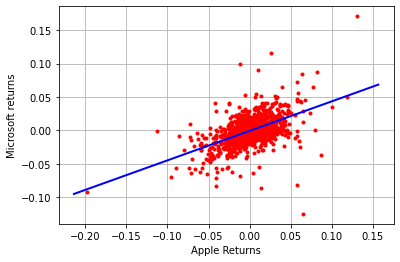

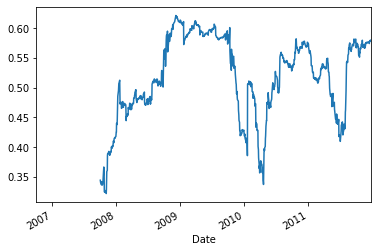

In [106]:
# Plot returns of AAPL and MSFT
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

# Show the plot
plt.show()

# Plot the rolling correlation
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()

# Show the plot
plt.show()

# Building a Trading Strategy

Primary analysis has been completed so we now formulate a trading strategy - Firstly we can consider common trading strategies before then attempting our own.

### Common strategies

From the introduction, you’ll still remember that a trading strategy is a fixed plan to go long or short in markets, but much more information you didn’t really get yet; In general, there are two common trading strategies: the momentum strategy and the reversion strategy.

#### Strategy 1

Firstly, the **momentum strategy** is also called divergence or trend trading. When you follow this strategy, you do so because you believe the movement of a quantity will continue in its current direction. Stated differently, you believe that stocks have momentum or upward or downward trends, that you can detect and exploit.

Some examples of this strategy are the moving average crossover, the dual moving average crossover, and turtle trading:

The moving average crossover is when the price of an asset moves from one side of a moving average to the other. This crossover represents a change in momentum and can be used as a point of making the decision to enter or exit the market. You’ll see an example of this strategy, which is the “hello world” of quantitative trading later on in this tutorial.

The dual moving average crossover occurs when a short-term average crosses a long-term average. This signal is used to identify that momentum is shifting in the direction of the short-term average. A buy signal is generated when the short-term average crosses the long-term average and rises above it, while a sell signal is triggered by a short-term average crossing long-term average and falling below it.

Turtle trading is a popular trend following strategy that was initially taught by Richard Dennis. The basic strategy is to buy futures on a 20-day high and sell on a 20-day low.

#### Strategy 2

Secondly, the **reversion strategy**, which is also known as convergence or cycle trading. This strategy departs from the belief that the movement of a quantity will eventually reverse. This might seem a little bit abstract, but will not be so anymore when you take the example. Take a look at the mean reversion strategy, where you actually believe that stocks return to their mean and that you can exploit when it deviates from that mean.

That already sounds a whole lot more practical, right?

Another example of this strategy, besides the mean reversion strategy, is the pairs trading mean-reversion, which is similar to the mean reversion strategy. Whereas the mean reversion strategy basically stated that stocks return to their mean, the pairs trading strategy extends this and states that if two stocks can be identified that have a relatively high correlation, the change in the difference in price between the two stocks can be used to signal trading events if one of the two moves out of correlation with the other. That means that if the correlation between two stocks has decreased, the stock with the higher price can be considered to be in a short position. It should be sold because the higher-priced stock will return to the mean. The lower-priced stock, on the other hand, will be in a long position because the price will rise as the correlation will return to normal.

#### Other strategies

Besides these two most frequent strategies, there are also other ones that you might come across once in a while, such as the **forecasting strategy**, which attempts to predict the direction or value of a stock, in this case, in subsequent future time periods based on certain historical factors. There’s also the **High-Frequency Trading (HFT)** strategy, which exploits the sub-millisecond market microstructure.

### Our simple strategy

Create two separate Simple Moving Averages (SMA) of a time series with differing lookback periods. If the short moving average exceeds the long moving average then go long, if the long moving average exceeds the short moving average then you exit.

In [107]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal  short_mavg  long_mavg  positions
Date                                                
2006-10-02     0.0    2.673571   2.673571        NaN
2006-10-03     0.0    2.659643   2.659643        0.0
2006-10-04     0.0    2.670476   2.670476        0.0
2006-10-05     0.0    2.670982   2.670982        0.0
2006-10-06     0.0    2.666929   2.666929        0.0
...            ...         ...        ...        ...
2011-12-23     1.0   13.859911  13.851739        0.0
2011-12-27     0.0   13.861321  13.862154       -1.0
2011-12-28     0.0   13.859411  13.872518        0.0
2011-12-29     0.0   13.867098  13.891057        0.0
2011-12-30     0.0   13.873875  13.902125        0.0

[1323 rows x 4 columns]


We first define your two different lookback periods: a short window and a long window. Set up two variables and assign one integer per variable.

Next, make an empty signals DataFrame, copy the index of your aapl data so that you can start calculating the daily buy or sell signal for your aapl data.

Create a column in your empty signals DataFrame that is named signal and initialize it by setting the value for all rows in this column to 0.0.

After the preparatory work, it’s time to create the set of short and long simple moving averages over the respective long and short time windows. Make use of the rolling() function to start your rolling window calculations: within the function, specify the window and the min_period, and set the center argument. In practice, this will result in a rolling() function to which you have passed either short_window or long_window, 1 as the minimum number of observations in the window that are required to have a value, and False, so that the labels are not set at the center of the window. Next, don’t forget to also chain the mean() function so that you calculate the rolling mean.

After you have calculated the mean average of the short and long windows, you should create a signal when the short moving average crosses the long moving average, but only for the period greater than the shortest moving average window. In Python, this will result in a condition: signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:]. Note that you add the [short_window:] to comply with the condition “only for the period greater than the shortest moving average window”. When the condition is true, the initialized value 0.0 in the signal column will be overwritten with 1.0. A “signal” is created! If the condition is false, the original value of 0.0 will be kept and no signal is generated. You use the NumPy where() function to set up this condition. Much the same like you read just now, the variable to which you assign this result is signals['signal'][short_window], because you only want to create signals for the period greater than the shortest moving average window!

Lastly, you take the difference of the signals in order to generate actual trading orders. In other words, in this column of your signals DataFrame, you’ll be able to distinguish between long and short positions, whether you’re buying or selling stock.

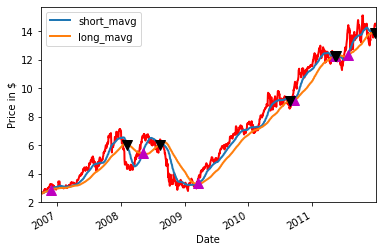

In [108]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

# Backtesting the Strategy

Assess the performance of the model

### Backtesting pitfalls

Ensure to test on relevant historical data

External events - market regime shifts, liquidity constraints etc.

Personal error - overfitting (optimisation bias), ignore strategy rules (inteference), introducing information into past data (lookahead bias).

There are many other pitfalls to consider.

### Backtesting components

Consists of four essential components usually present in every backtester:

* Data Handler, interface to a set of data
* Strategy, generates a signal to go long or short dependent on the data
* Portfolio, generates orders and manages PnL
* Execution Handler, sends the order to the broker and receives the 'fills' or signals that the stock has been bought or sold

### Python Tools

Implementing the backtesting can be done with the use of tools such as pandas, numpy, scipy, scikit learn etc, involving vectorization, optimisation and linear algebra routines which you can use when youre developing trading strategies.

Statsmodel library is ideal for time series analysis.

IbPy and ZipLine libraries - former offers Python API for interactive brokers online trading system, latter is all-in-one backtesting framework that powers Quantopian.

### Implementation of a simple backtester

So we have a strategy, data handler, a portfolio and a execution handler for our simple backtester. Strategy has been implemented above and *pandas-datareader* is the data handler currently in use.

So we have to implement the execution handler and the portfolio. We are gunna focus on creating a portfolio.

To do this we will create a variable *initial-capital* and a DatFrame called *positions*. We use the index from the *signals* DataFrame as that is the tim frame we want to consider.

We then create column *'AAPL* and then on days when the signal is 1 and the SMA crosses the LMA (for a period greater than the shortest moving average window) buy 100 shares. When it is 0 the result will be 0 as a result of the operation *100 x signals['signal']* 

A new DataFrame *portfolio* is created to store the market value of an open position.

Create a dataframe that stores the differences in positions (number of stock).

Then the real backtesting begins: you create a new column to the *portfolio* DataFrame with name *holdings*, which stores the value of the positions or shares you have bought, multiplied by the ‘Adj Close’ price.

Your *portfolio* also contains a *cash* column, which is the capital that you still have left to spend: it is calculated by taking your *initial_capital* and subtracting your holdings (the price that you paid for buying stock).

You’ll also add a *total* column to your *portfolio* DataFrame, which contains the sum of your cash and the holdings that you own.

Lastly, you also add a *returns* column to your portfolio, in which you’ll store the returns

In [112]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.head())

            AAPL  holdings      cash     total  returns
Date                                                   
2006-10-02   0.0       0.0  100000.0  100000.0      NaN
2006-10-03   0.0       0.0  100000.0  100000.0      0.0
2006-10-04   0.0       0.0  100000.0  100000.0      0.0
2006-10-05   0.0       0.0  100000.0  100000.0      0.0
2006-10-06   0.0       0.0  100000.0  100000.0      0.0


We can then visualise the portfolio value over the years with the help of matplotlib and the results of the backtest.

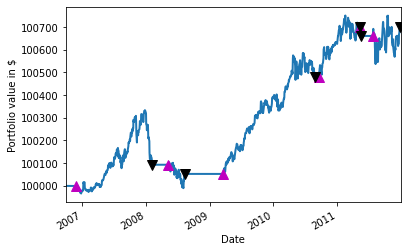

In [113]:
# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In the above graph the pink upticks represent a purchase of the stock where the black upticks represent selling it back.

## Backtesting with Zipline and Quantopian

Its common to use a backtesting platform, (Quantopian - powered by zipline), for backtesters.

In [115]:
def initialize(context):
    context.sym = symbol('AAPL')
    context.i = 0


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.sym, 'price', 100, '1d').mean()
    long_mavg = data.history(context.sym, 'price', 300, '1d').mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.sym, 100)
    elif short_mavg < long_mavg:
        order_target(context.sym, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.sym, "price"),
           short_mavg=short_mavg,
           long_mavg=long_mavg)

The above would be put into quantopian under the new algorithm button.

### Evaluating the strategy

Sharpe ratio - helps see whether its smart or just taking risk with a ratio > 1 seen as acceptable by investors, 2 is very good, 3 is excellent.

Sharpe is not normally considered as a standalone but we will for now.

In [117]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.7209791379023839


### Maximum Drawdown

largest single drop from peak to bottom in the value of a portfolio helps indicate the risk of the portfolio.

(min_periods=1 as want first 252 days data have an expanding window)

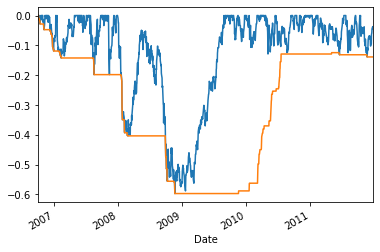

In [122]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

### Compound Annual Growth Rate

Provides a constant rate of return over the time period. The rate tells you what you really have at the end of the investment period. ((EV / BV) ^ (1/n)) - 1

In [123]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1

# Print the CAGR
print(cagr)

0.38234457063677674
